# Dados da indústria brasileira de defensivos agrícolas de 2013 a 2017
## Fonte: Sindiveg

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import cm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_vendas_cultura = pd.read_csv('data_vendas_cultura.csv')
data_vendas_estado = pd.read_csv('data_vendas_estado.csv')
data_vendas_tipo = pd.read_csv('data_vendas_tipo.csv')

## 1. Análise dos estados destino dos produtos

---

In [3]:
# ordem decrescente de valores totais
data_vendas_estado = data_vendas_estado.sort_values('Total',ascending=False)
data_vendas_estado.head()

,Estado,2013,2014,2015,2016,2017,Total
0,MT,2507963846,2566717325,2197602078,1946958976,1.841883e+09,1.106113e+10
1,SP,1612631028,1478498799,1284591707,1324790594,1.300971e+09,7.001483e+09
3,PR,1355133110,1573759321,1282975015,1301679075,9.998435e+08,6.513390e+09
2,RS,1181841373,1582228146,1234296874,1259519236,1.087979e+09,6.345865e+09
4,GO,1158939828,1264482418,840175544,922388102,8.036628e+08,4.989649e+09


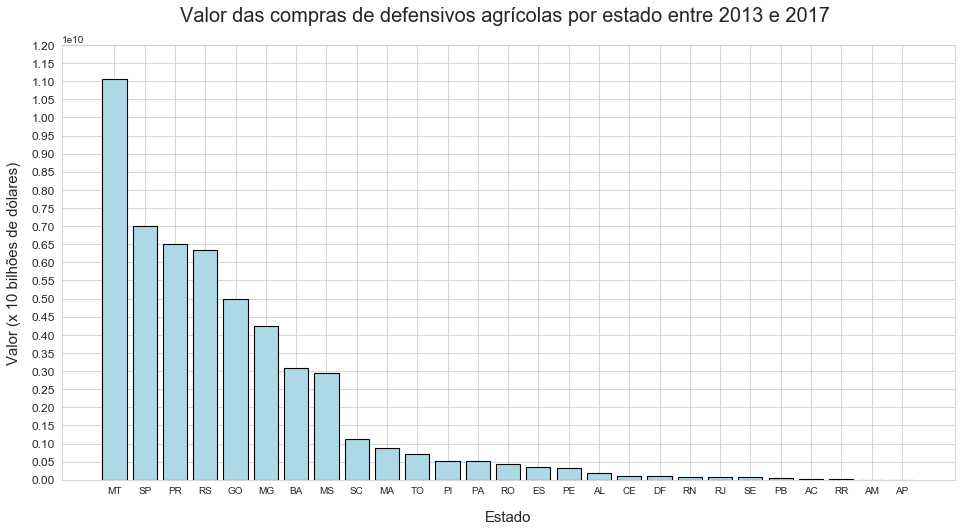

In [4]:
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(16,8))
plt.bar(data_vendas_estado.Estado, data_vendas_estado.Total, color='lightblue', edgecolor='black', linewidth = 1.1)

plt.title('Valor das compras de defensivos agrícolas por estado entre 2013 e 2017 ', size=20, y=1.04)
plt.xlabel('Estado', size = 15, labelpad = 15)
plt.ylabel('Valor (x 10 bilhões de dólares)', size=15, labelpad = 10)
plt.yticks(np.arange(0,data_vendas_estado['Total'].max()+0.1*10**10,0.05*10**10),fontsize=12)
f.savefig('01_Grafico_Barras_Vendas_por_Estado.png', dpi=300)
plt.show()

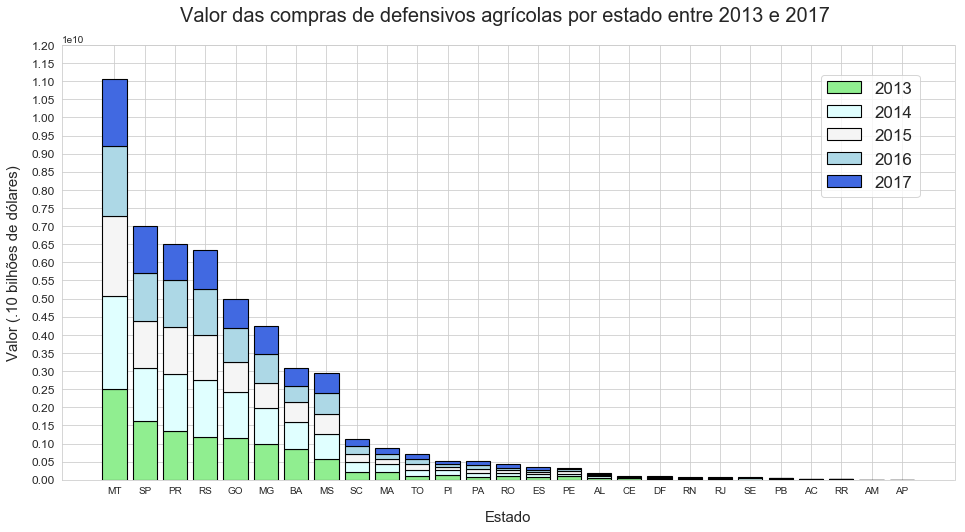

In [5]:
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(16,8))

a1 = plt.bar(data_vendas_estado.Estado, data_vendas_estado['2013'], color='lightgreen', edgecolor='black', linewidth = 1.1)
a2 = plt.bar(data_vendas_estado.Estado, data_vendas_estado['2014'], 
        bottom = data_vendas_estado['2013'], 
        color='lightcyan', edgecolor='black', linewidth = 1.1)
a3 = plt.bar(data_vendas_estado.Estado, data_vendas_estado['2015'], 
        bottom = (data_vendas_estado['2013']+data_vendas_estado['2014']), 
        color='whitesmoke', edgecolor='black', linewidth = 1.1)
a4 = plt.bar(data_vendas_estado.Estado, data_vendas_estado['2016'], 
        bottom = (data_vendas_estado['2013']+data_vendas_estado['2014']+data_vendas_estado['2015']), 
        color='lightblue', edgecolor='black', linewidth = 1.1)
a5 = plt.bar(data_vendas_estado.Estado, data_vendas_estado['2017'], 
        bottom = (data_vendas_estado['2013']+data_vendas_estado['2014']+data_vendas_estado['2015']+data_vendas_estado['2016']), 
        color='royalblue', edgecolor='black', linewidth = 1.1)

plt.title('Valor das compras de defensivos agrícolas por estado entre 2013 e 2017 ', size=20, y=1.04)
plt.xlabel('Estado', size = 15, labelpad = 15)
plt.ylabel('Valor (.10 bilhões de dólares)', size=15, labelpad = 10)
plt.yticks(np.arange(0,data_vendas_estado['Total'].max()+0.1*10**10,0.05*10**10),fontsize=12)
plt.legend([a1,a2,a3,a4,a5],['2013','2014','2015','2016','2017'], fontsize = 17, loc = (.85,.65))
f.savefig('02_Grafico_Barras_Vendas_por_Estado_2013_a_2017.png', dpi=300)
plt.show()

In [6]:
# agrupando os dados de 15 para frente
data_vendas_estado.sort_values('Total',ascending=False)[15:]

,Estado,2013,2014,2015,2016,2017,Total
15,PE,101342745,72447160,56782207,62441244,3.838218e+07,3.313955e+08
16,AL,62517952,44707377,25229839,25629927,2.568167e+07,1.837668e+08
18,CE,45945930,17516805,12005009,11481957,1.188728e+07,9.883698e+07
17,DF,25783307,19697805,12149259,18733907,1.523667e+07,9.160095e+07
23,RN,16923203,13839487,14551724,16229074,7.495094e+06,6.903858e+07
20,RJ,17140885,17568660,9682969,13115644,1.043465e+07,6.794280e+07
19,SE,6111641,30539896,7504707,10450032,1.055753e+07,6.516380e+07
21,PB,17597568,9761486,9359288,8882016,1.007937e+07,5.567973e+07
22,AC,4056688,7620412,5087950,8391671,1.002727e+07,3.518399e+07
24,RR,13297856,3910052,1781555,3676485,5.025863e+06,2.769181e+07


In [7]:
#juntando os dados com as linhas agrupadas (16 linhas)
data_vendas_estado_2 = data_vendas_estado.sort_values('Total',ascending=False)[:15]
data_vendas_estado_2.loc[15] = ['Outros', 
                                data_vendas_estado.sort_values('Total',ascending=False)[15:]['2013'].sum(),
                                data_vendas_estado.sort_values('Total',ascending=False)[15:]['2014'].sum(),
                                data_vendas_estado.sort_values('Total',ascending=False)[15:]['2015'].sum(),
                                data_vendas_estado.sort_values('Total',ascending=False)[15:]['2016'].sum(),
                                data_vendas_estado.sort_values('Total',ascending=False)[15:]['2017'].sum(),
                               data_vendas_estado.sort_values('Total',ascending=False)[15:]['Total'].sum()]
data_vendas_estado_2.tail()

,Estado,2013,2014,2015,2016,2017,Total
12,PI,131039626,141154533,89745285,64067157,1.052816e+08,5.312882e+08
11,PA,84413163,111344082,95911695,109260905,1.247996e+08,5.257294e+08
13,RO,91567525,96928779,69420048,81011457,8.820838e+07,4.271362e+08
14,ES,78022518,90323508,55305982,55648260,6.411662e+07,3.434169e+08
15,Outros,312349663,239827915,154962916,181080685,1.482419e+08,1.036463e+09


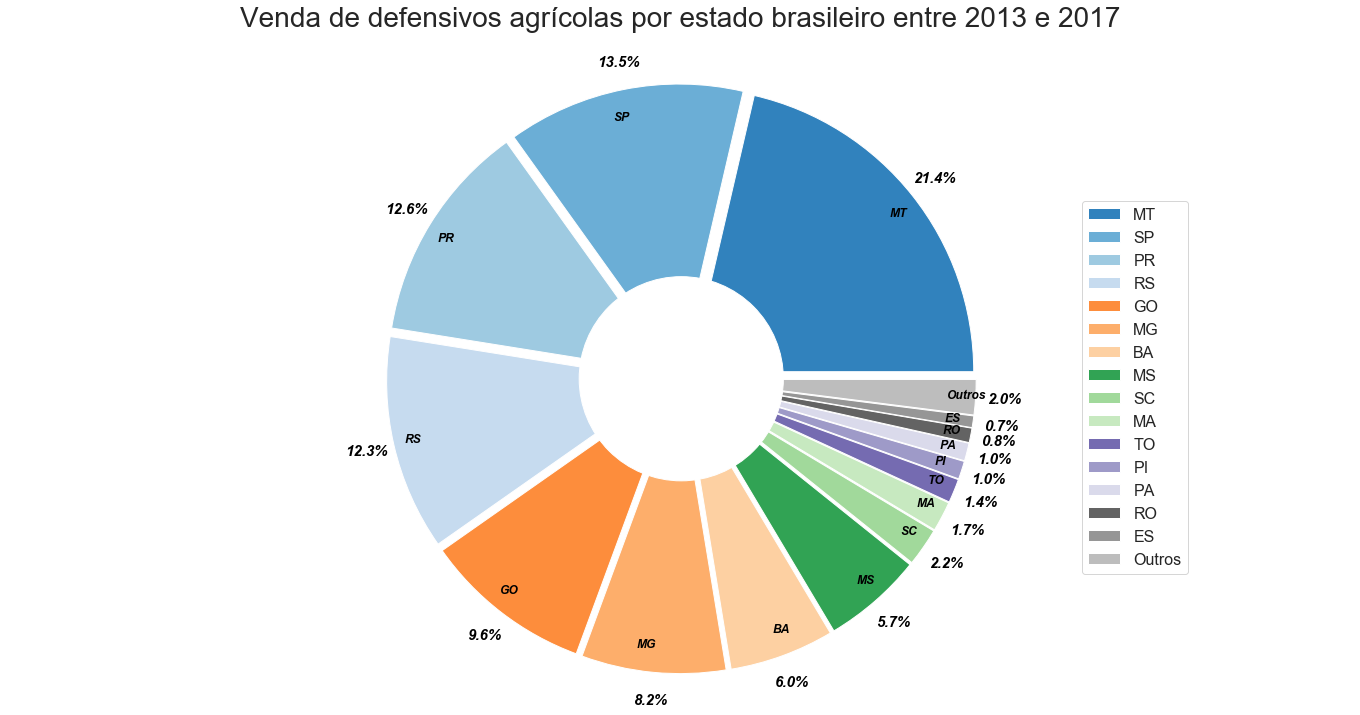

In [8]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

fig1, ax1 = plt.subplots()
fig1.set_size_inches((24,12))

cs=cm.tab20c(np.arange(16)/16)

explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)
patches, texts, autotexts = ax1.pie(x=data_vendas_estado_2.Total, colors = cs, radius=5, autopct='%1.1f%%',
        labels = data_vendas_estado_2.Estado, explode = explode,
        shadow=False,pctdistance=1.1, labeldistance= 0.9,textprops={'fontsize': 15, 'color': 'black',
                                                                   'fontweight' : 'heavy', 'style':'italic'})

#texts[1].set_fontsize(20)

centre_circle = plt.Circle((0,0),1.8,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')

plt.title('Venda de defensivos agrícolas por estado brasileiro entre 2013 e 2017'  , size=28, y=1.03)
plt.legend(data_vendas_estado_2.Estado, fontsize = 16, loc = (.8,.2))
fig1.savefig('03_Grafico_Pizza_Vendas_por_Estado.png', dpi=300)

plt.show()

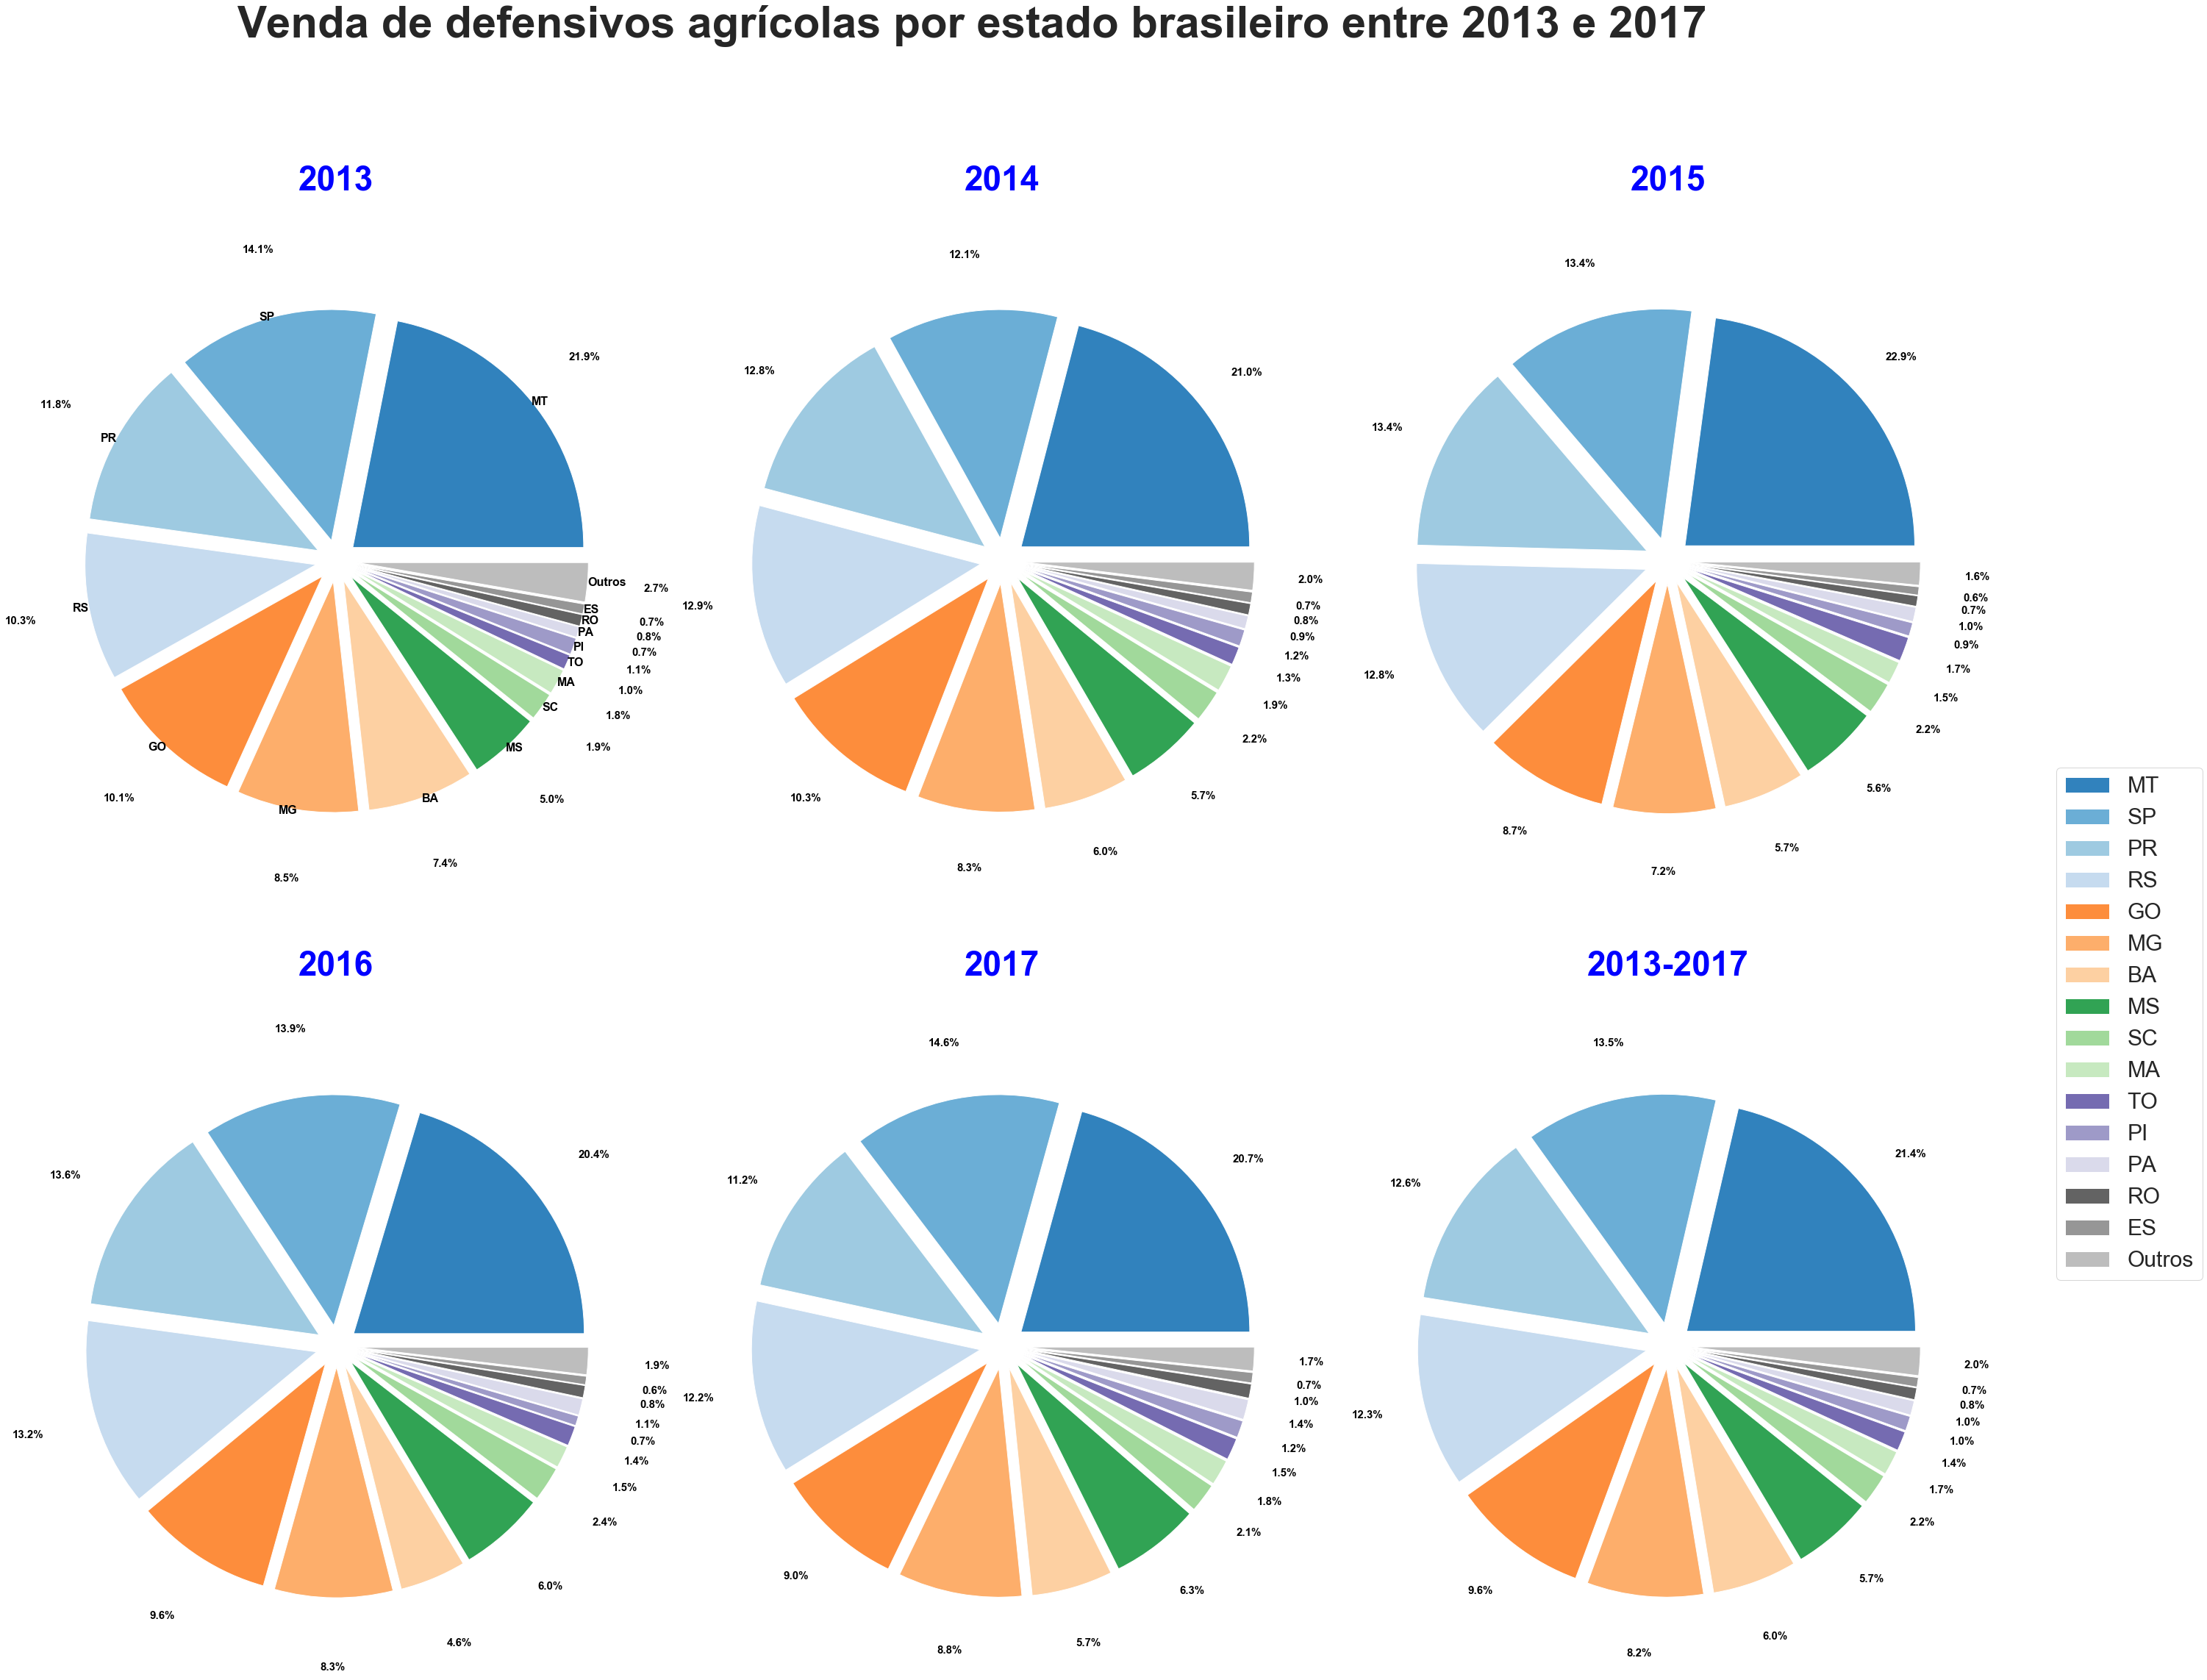

In [9]:
fig = plt.figure()
ax1 = plt.subplot(231)
ax2 = plt.subplot(232)
ax3 = plt.subplot(233)
ax4 = plt.subplot(234)
ax5 = plt.subplot(235)
ax6 = plt.subplot(236)

import matplotlib as mpl
mpl.rcParams['font.size'] = 16

fig.set_size_inches((46,36))
cs=cm.tab20c(np.arange(16)/16)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

ax1.pie(x=data_vendas_estado_2['2013'], colors = cs, autopct='%1.1f%%', radius = 1.1,
        labels = data_vendas_estado_2.Estado, explode = explode,
        shadow=False,pctdistance=1.3, labeldistance= 1.,textprops={'fontsize': 15, 'color': 'black', 'fontweight' : 'heavy'})
ax2.pie(x=data_vendas_estado_2['2014'], colors = cs, autopct='%1.1f%%', explode = explode,
        shadow=False,pctdistance=1.25,textprops={'fontsize': 15, 'color': 'black', 'fontweight' : 'heavy'})
ax3.pie(x=data_vendas_estado_2['2015'], colors = cs, autopct='%1.1f%%', explode = explode,
        shadow=False,pctdistance=1.25,textprops={'fontsize': 15, 'color': 'black', 'fontweight' : 'heavy'})
ax4.pie(x=data_vendas_estado_2['2016'], colors = cs, autopct='%1.1f%%', radius = 1.1, explode = explode,
        shadow=False,pctdistance=1.3, labeldistance= 1.,textprops={'fontsize': 15, 'color': 'black', 'fontweight' : 'heavy'})
ax5.pie(x=data_vendas_estado_2['2017'], colors = cs, autopct='%1.1f%%', explode = explode,
        shadow=False,pctdistance=1.25,textprops={'fontsize': 15, 'color': 'black', 'fontweight' : 'heavy'})
ax6.pie(x=data_vendas_estado_2['Total'], colors = cs, autopct='%1.1f%%', explode = explode,
        shadow=False,pctdistance=1.25,textprops={'fontsize': 15, 'color': 'black', 'fontweight' : 'heavy'})

ax1.axis('equal'),ax2.axis('equal'),ax3.axis('equal'), ax4.axis('equal'),ax5.axis('equal'),ax6.axis('equal')

ax1.set_title('2013', size=46,fontweight='heavy', y=1.06, color = 'blue')
ax2.set_title('2014', size=46,fontweight='heavy', y=1.06, color = 'blue')
ax3.set_title('2015', size=46,fontweight='heavy', y=1.06, color = 'blue')
ax4.set_title('2016', size=46,fontweight='heavy', y=1.06, color = 'blue')
ax5.set_title('2017', size=46,fontweight='heavy', y=1.06, color = 'blue')
ax6.set_title('2013-2017', size=46,fontweight='heavy', y=1.06, color = 'blue')

fig.suptitle('Venda de defensivos agrícolas por estado brasileiro entre 2013 e 2017', size=60, y=1.,fontweight='heavy')
plt.legend(data_vendas_estado_2.Estado, fontsize = 30,loc = (1.2,.6))
fig.savefig('04_Graficos_Pizza_Vendas_por_Estado_2013_a_2017.png', dpi=300)

plt.show()

In [10]:
# transpondo: primeiro cria novo index
data_vendas_estado.set_index('Estado').T.reset_index()

Estado,index,MT,SP,PR,RS,GO,MG,BA,MS,SC,...,CE,DF,RN,RJ,SE,PB,AC,RR,AM,AP
0,2013,2.507964e+09,1.612631e+09,1.355133e+09,1.181841e+09,1.158940e+09,9.753390e+08,8.527676e+08,5.728621e+08,2.217872e+08,...,45945930.00,25783307.00,1.692320e+07,17140885.00,6111641.00,17597568.00,4056688.00,1.329786e+07,999699.00,632189.000
1,2014,2.566717e+09,1.478499e+09,1.573759e+09,1.582228e+09,1.264482e+09,1.015414e+09,7.317102e+08,6.981442e+08,2.738452e+08,...,17516805.00,19697805.00,1.383949e+07,17568660.00,30539896.00,9761486.00,7620412.00,3.910052e+06,1323042.00,895733.000
2,2015,2.197602e+09,1.284592e+09,1.282975e+09,1.234297e+09,8.401755e+08,6.931540e+08,5.492112e+08,5.408235e+08,2.114389e+08,...,12005009.00,12149259.00,1.455172e+07,9682969.00,7504707.00,9359288.00,5087950.00,1.781555e+06,538399.00,290010.000
3,2016,1.946959e+09,1.324791e+09,1.301679e+09,1.259519e+09,9.223881e+08,7.915826e+08,4.428925e+08,5.725318e+08,2.301083e+08,...,11481957.00,18733907.00,1.622907e+07,13115644.00,10450032.00,8882016.00,8391671.00,3.676485e+06,1324808.00,723920.000
4,2017,1.841883e+09,1.300971e+09,9.998435e+08,1.087979e+09,8.036628e+08,7.788089e+08,5.091555e+08,5.608295e+08,1.826323e+08,...,11887282.22,15236670.25,7.495094e+06,10434646.68,10557527.56,10079373.82,10027269.95,5.025863e+06,2251787.77,1182578.476
5,Total,1.106113e+10,7.001483e+09,6.513390e+09,6.345865e+09,4.989649e+09,4.254299e+09,3.085737e+09,2.945191e+09,1.119812e+09,...,98836983.22,91600948.25,6.903858e+07,67942804.68,65163803.56,55679731.82,35183990.95,2.769181e+07,6437735.77,3724430.476


In [39]:
#transposicao: novo index em estado, transpoe, e reseta index
data_vendas_estado_transp = data_vendas_estado.set_index('Estado').T.reset_index()
#deleta linha 'total'
data_vendas_estado_transp = data_vendas_estado_transp.drop([5])
#renomeia index para ano
data_vendas_estado_transp = data_vendas_estado_transp.rename(columns = {'index':'Ano'})
data_vendas_estado_transp

Estado,Ano,MT,SP,PR,RS,GO,MG,BA,MS,SC,...,CE,DF,RN,RJ,SE,PB,AC,RR,AM,AP
0,2013,2.507964e+09,1.612631e+09,1.355133e+09,1.181841e+09,1.158940e+09,9.753390e+08,852767606.0,572862140.0,221787217.0,...,45945930.00,25783307.00,1.692320e+07,17140885.00,6111641.00,17597568.00,4056688.00,1.329786e+07,999699.00,632189.000
1,2014,2.566717e+09,1.478499e+09,1.573759e+09,1.582228e+09,1.264482e+09,1.015414e+09,731710176.0,698144216.0,273845161.0,...,17516805.00,19697805.00,1.383949e+07,17568660.00,30539896.00,9761486.00,7620412.00,3.910052e+06,1323042.00,895733.000
2,2015,2.197602e+09,1.284592e+09,1.282975e+09,1.234297e+09,8.401755e+08,6.931540e+08,549211197.0,540823473.0,211438857.0,...,12005009.00,12149259.00,1.455172e+07,9682969.00,7504707.00,9359288.00,5087950.00,1.781555e+06,538399.00,290010.000
3,2016,1.946959e+09,1.324791e+09,1.301679e+09,1.259519e+09,9.223881e+08,7.915826e+08,442892516.0,572531841.0,230108289.0,...,11481957.00,18733907.00,1.622907e+07,13115644.00,10450032.00,8882016.00,8391671.00,3.676485e+06,1324808.00,723920.000
4,2017,1.841883e+09,1.300971e+09,9.998435e+08,1.087979e+09,8.036628e+08,7.788089e+08,509155540.0,560829527.1,182632327.3,...,11887282.22,15236670.25,7.495094e+06,10434646.68,10557527.56,10079373.82,10027269.95,5.025863e+06,2251787.77,1182578.476


In [12]:
data_vendas_estado_transp.columns[1:]

Index(['MT', 'SP', 'PR', 'RS', 'GO', 'MG', 'BA', 'MS', 'SC', 'MA', 'TO', 'PI',
       'PA', 'RO', 'ES', 'PE', 'AL', 'CE', 'DF', 'RN', 'RJ', 'SE', 'PB', 'AC',
       'RR', 'AM', 'AP'],
      dtype='object', name='Estado')

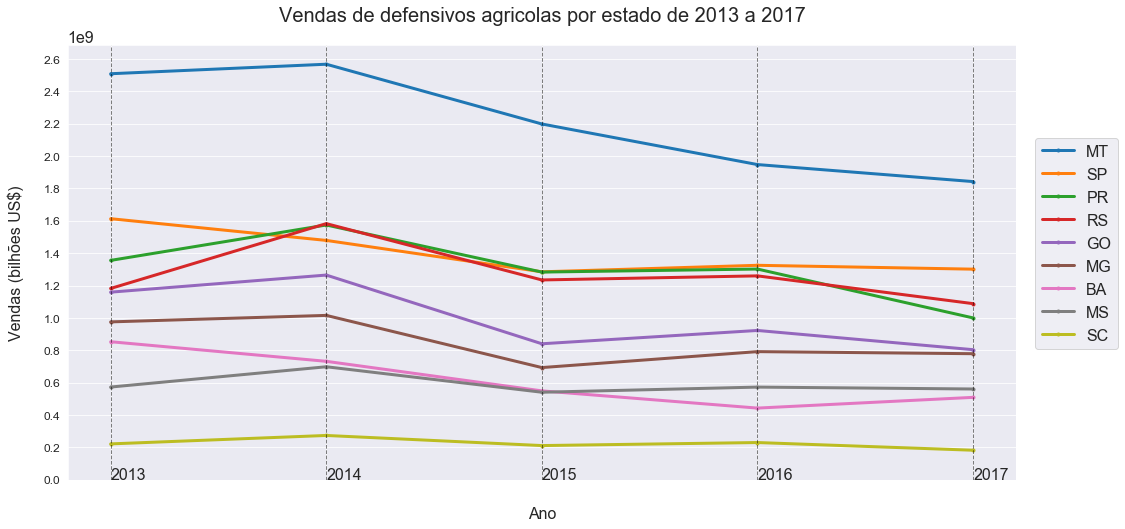

In [13]:
sns.set_style('darkgrid')

f = data_vendas_estado_transp.plot(x = 'Ano', y = data_vendas_estado_transp.columns[1:10], figsize = (17,8), 
                                   marker = '.', style = '-', linewidth = 3)

# axvline e ano para cada ano
for i in data_vendas_estado_transp.Ano:
    plt.axvline(x=i,color='k', linewidth=1, linestyle='--', label=i, alpha = 0.5)
    # anotar o ano
    plt.annotate(i, xy=(i,0))

plt.yticks(np.arange(0,2.8*10**9,0.2*10**9),fontsize=12)
plt.xticks(fontsize=12)
plt.title('Vendas de defensivos agricolas por estado de 2013 a 2017',size=20, y=1.04)
plt.xlabel('Ano',size=16, labelpad=20)
plt.ylabel('Vendas (bilhões US$)',size=16, labelpad=20)
plt.legend(data_vendas_estado_transp.columns[1:10], fontsize = 16, loc = (1.02,.3))
fig = f.get_figure()
fig.savefig('05_Grafico_linha_Vendas_por_Estado.png', dpi=300)

plt.show()

In [14]:
# Nova coluna com as vendas totais de cada ano

data_vendas_estado_transp['Soma'] = data_vendas_estado_transp[data_vendas_estado_transp.columns[1:]].sum(axis=1)
data_vendas_estado_transp

Estado,Ano,MT,SP,PR,RS,GO,MG,BA,MS,SC,...,DF,RN,RJ,SE,PB,AC,RR,AM,AP,Soma
0,2013,2.507964e+09,1.612631e+09,1.355133e+09,1.181841e+09,1.158940e+09,9.753390e+08,852767606.0,572862140.0,221787217.0,...,25783307.00,1.692320e+07,17140885.00,6111641.00,17597568.00,4056688.00,1.329786e+07,999699.00,632189.000,1.145428e+10
1,2014,2.566717e+09,1.478499e+09,1.573759e+09,1.582228e+09,1.264482e+09,1.015414e+09,731710176.0,698144216.0,273845161.0,...,19697805.00,1.383949e+07,17568660.00,30539896.00,9761486.00,7620412.00,3.910052e+06,1323042.00,895733.000,1.224855e+10
2,2015,2.197602e+09,1.284592e+09,1.282975e+09,1.234297e+09,8.401755e+08,6.931540e+08,549211197.0,540823473.0,211438857.0,...,12149259.00,1.455172e+07,9682969.00,7504707.00,9359288.00,5087950.00,1.781555e+06,538399.00,290010.000,9.608406e+09
3,2016,1.946959e+09,1.324791e+09,1.301679e+09,1.259519e+09,9.223881e+08,7.915826e+08,442892516.0,572531841.0,230108289.0,...,18733907.00,1.622907e+07,13115644.00,10450032.00,8882016.00,8391671.00,3.676485e+06,1324808.00,723920.000,9.560272e+09
4,2017,1.841883e+09,1.300971e+09,9.998435e+08,1.087979e+09,8.036628e+08,7.788089e+08,509155540.0,560829527.1,182632327.3,...,15236670.25,7.495094e+06,10434646.68,10557527.56,10079373.82,10027269.95,5.025863e+06,2251787.77,1182578.476,8.892955e+09


In [15]:
data_vendas_estado_transp[data_vendas_estado_transp.Ano =='2014'].Soma.values

array([1.22485456e+10])

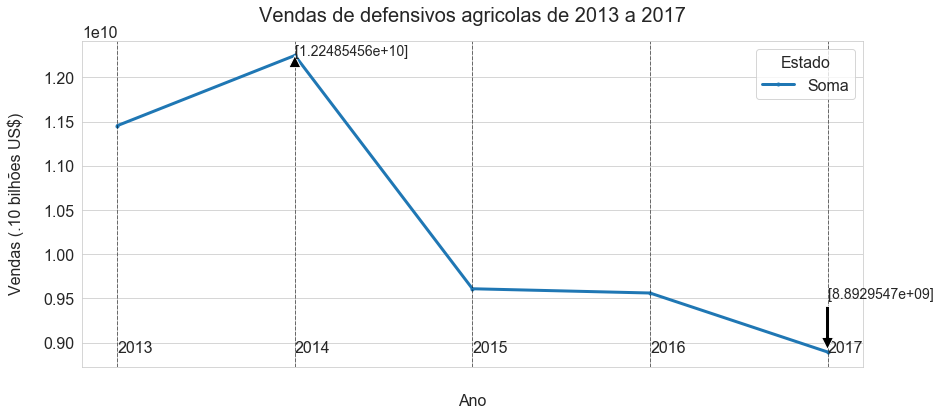

In [16]:
sns.set_style('whitegrid')

f = data_vendas_estado_transp.plot(x = 'Ano', y = data_vendas_estado_transp.columns[-1:], figsize = (14,6), 
                                   marker = '.', style = '-', linewidth = 3)
# axvline e ano para cada ano
for i in data_vendas_estado_transp.Ano:
    plt.axvline(x=i,color='k', linewidth=1, linestyle='--', label=i, alpha = 0.5)
    # anotar o ano
    plt.annotate(i, xy=(i,data_vendas_estado_transp.Soma.min()))

plt.annotate(str(data_vendas_estado_transp[data_vendas_estado_transp.Ano =='2014'].Soma.values), 
             xy=('2014', data_vendas_estado_transp[data_vendas_estado_transp.Ano =='2014'].Soma),
             arrowprops=dict(facecolor='black', shrink=0.05), size=14)
plt.annotate(str(data_vendas_estado_transp[data_vendas_estado_transp.Ano =='2017'].Soma.values), 
             xy=('2017', data_vendas_estado_transp[data_vendas_estado_transp.Ano =='2017'].Soma),
             xytext = ('2017', 0.95*10**10),
             arrowprops=dict(facecolor='black', shrink=0.05), size=14)

plt.title('Vendas de defensivos agricolas de 2013 a 2017',size=20, y=1.04)
plt.xlabel('Ano',size=16, labelpad=20)
plt.ylabel('Vendas (.10 bilhões US$)',size=16, labelpad=20)
fig = f.get_figure()
fig.savefig('06_Grafico_linha_Vendas_Total.png', dpi=300)

plt.show()

---

## 2. Vendas por tipo de produto

---

In [17]:
#deletando as colunas de volume
data_vendas_tipo_valor = data_vendas_tipo.drop(['2013_volume_ing','2013_volume','2014_volume_ing','2014_volume',
                                               '2015_volume_ing','2015_volume','2016_volume_ing','2016_volume',
                                               '2017_volume_ing','2017_volume',], axis = 1)
data_vendas_tipo_valor.columns = ['Segmento', '2013', '2014', '2015', '2016','2017']
# deletando a linha 'total'
data_vendas_tipo_valor = data_vendas_tipo_valor.drop([7])
data_vendas_tipo_valor

,Segmento,2013,2014,2015,2016,2017
0,Herbicidas Seletivos,2017203169,1797244660,1542552422,1638596393,1.776055e+09
1,Herbicidas Nao Seletivos,1722207376,2105342925,1543979679,1470488661,1.335825e+09
2,Fungicidas,2500961170,2824854310,2827712357,3099973557,2.436800e+09
3,Inseticidas,3891907884,4360365389,2731500871,2307513398,2.379853e+09
4,TS,753019742,614353587,513213061,562333999,5.511697e+08
5,Acaricidas,118747434,116988897,102624976,100572475,1.115238e+08
6,Outros,450237120,429395811,346822995,380793526,3.017274e+08


In [18]:
# transpondo
data_vendas_tipo_valor_transp = data_vendas_tipo_valor.set_index('Segmento').T.reset_index()
data_vendas_tipo_valor_transp = data_vendas_tipo_valor_transp.rename({'index':'Ano'}, axis = 'columns')

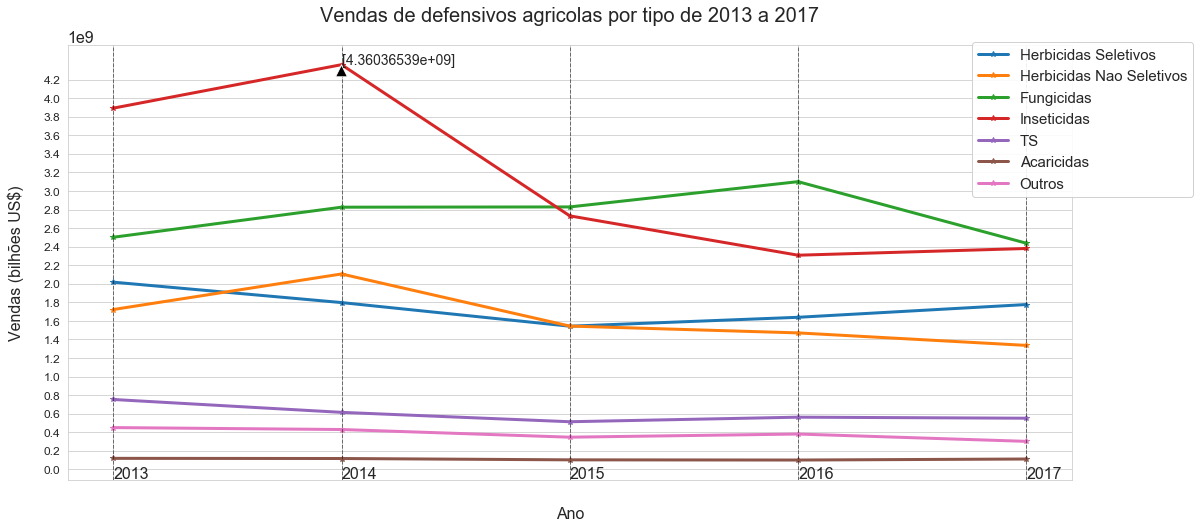

In [19]:
f = data_vendas_tipo_valor_transp.plot(x='Ano', y= data_vendas_tipo_valor_transp.columns[1:], figsize = (18,8), 
                                   marker = '*', style = '-', linewidth = 3)

# axvline e ano para cada ano
for i in data_vendas_estado_transp.Ano:
    plt.axvline(x=i,color='k', linewidth=1, linestyle='--', alpha = 0.5)
    # anotar o ano
    plt.annotate(i, xy=(i,-0.1*10**9))
    
plt.annotate(str(data_vendas_tipo_valor_transp[data_vendas_tipo_valor_transp.Ano =='2014'].Inseticidas.values), 
             xy=('2014', data_vendas_tipo_valor_transp[data_vendas_tipo_valor_transp.Ano =='2014'].Inseticidas),
             arrowprops=dict(facecolor='black', shrink=0.05), size=14)

plt.yticks(np.arange(0,4.3*10**9,0.2*10**9),fontsize=12)
plt.xticks(fontsize=12)
plt.title('Vendas de defensivos agricolas por tipo de 2013 a 2017',size=20, y=1.04)
plt.xlabel('Ano',size=16, labelpad=20)
plt.ylabel('Vendas (bilhões US$)',size=16, labelpad=20)
plt.legend(fontsize = 15, loc = (.9,.65), framealpha = 0.9)
fig = f.get_figure()
fig.savefig('07_Grafico_linha_Vendas_Tipo_de_Defensivo.png', dpi=300)

plt.show()

In [20]:
#criando nova coluna com a soma das outras colunas
data_vendas_tipo_valor['Soma'] = data_vendas_tipo_valor[data_vendas_tipo_valor.columns[1:]].sum(axis=1)
data_vendas_tipo_valor

,Segmento,2013,2014,2015,2016,2017,Soma
0,Herbicidas Seletivos,2017203169,1797244660,1542552422,1638596393,1.776055e+09,8.771652e+09
1,Herbicidas Nao Seletivos,1722207376,2105342925,1543979679,1470488661,1.335825e+09,8.177844e+09
2,Fungicidas,2500961170,2824854310,2827712357,3099973557,2.436800e+09,1.369030e+10
3,Inseticidas,3891907884,4360365389,2731500871,2307513398,2.379853e+09,1.567114e+10
4,TS,753019742,614353587,513213061,562333999,5.511697e+08,2.994090e+09
5,Acaricidas,118747434,116988897,102624976,100572475,1.115238e+08,5.504576e+08
6,Outros,450237120,429395811,346822995,380793526,3.017274e+08,1.908977e+09


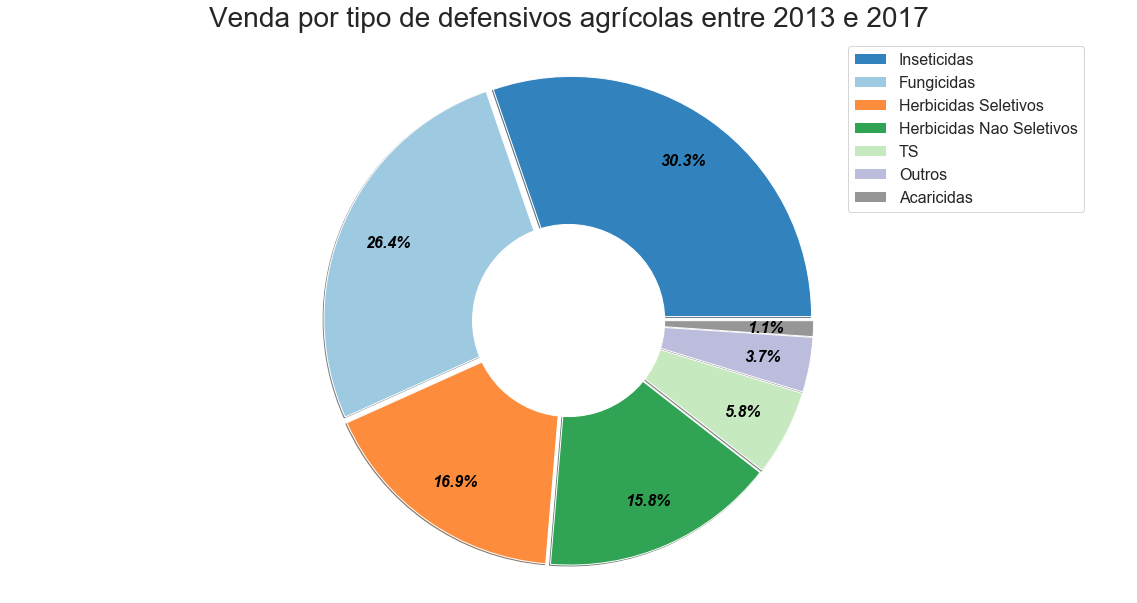

In [21]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

fig1, ax1 = plt.subplots()
fig1.set_size_inches((20,10))

cs=cm.tab20c(np.arange(7)/7)

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
patches, texts, autotexts = ax1.pie(x=data_vendas_tipo_valor.sort_values('Soma', ascending=False).Soma, colors = cs, radius=5, autopct='%1.1f%%', 
        explode = explode,shadow=True,pctdistance=0.8, textprops={'fontsize': 16, 'color': 'black',
                                                                   'fontweight' : 'heavy', 'style':'italic'})

#texts[1].set_fontsize(20)

centre_circle = plt.Circle((0,0),2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')

plt.title('Venda por tipo de defensivos agrícolas entre 2013 e 2017'  , size=28, y=1.03)
plt.legend(data_vendas_tipo_valor.sort_values('Soma', ascending=False).Segmento, fontsize = 16, loc = (.75,.7))
fig1.savefig('08_Grafico_Pizza_Vendas_por_Tipo_Total.png', dpi=300)

plt.show()

---

## 3. Vendas por tipos de cultura

---

In [22]:
data_vendas_cultura.head()

,Cultura,2013_valor,2013_volume,2014_valor,2014_volume,2015_valor,2015_volume,2016_valor,2016_volume,2017_valor,2017_volume
0,Soja,5866403456,475818575,6804513174,504016440,4972049166,470335549,5324381897,502859187,4.637959e+09,0
1,Cana-de-acucar,1158865045,77474184,1031049511,68150591,983635664,72913034,938939682,61479982,1.042475e+09,0
2,Milho Safrinha,594558820,62390180,645880519,63183780,657504135,80755007,653343276,81128680,6.512101e+08,0
3,Algodao,1040506078,70362029,923778657,60039012,702875273,53634164,464486204,39173604,5.991426e+08,0
4,Milho Safra,504537904,49578322,431369387,41651258,280425787,36156268,340401624,47969608,2.943592e+08,0


In [23]:
#deletando colunas de volume
data_vendas_cultura = data_vendas_cultura.drop(['2013_volume','2014_volume','2015_volume','2016_volume','2017_volume'], axis=1)

In [24]:
#renomeando as colunas
data_vendas_cultura.columns = ['Cultura', '2013', '2014', '2015', '2016', '2017']

In [25]:
#deletando a ultima linha
data_vendas_cultura = data_vendas_cultura.drop([27])

In [26]:
#criando nova coluna com a soma de todas as colunas
data_vendas_cultura['2013-2017'] = data_vendas_cultura[data_vendas_cultura.columns[1:]].sum(axis=1)

In [27]:
#ordem decresente com base na nova coluna soma
data_vendas_cultura = data_vendas_cultura.sort_values(['2013-2017'], ascending=False)

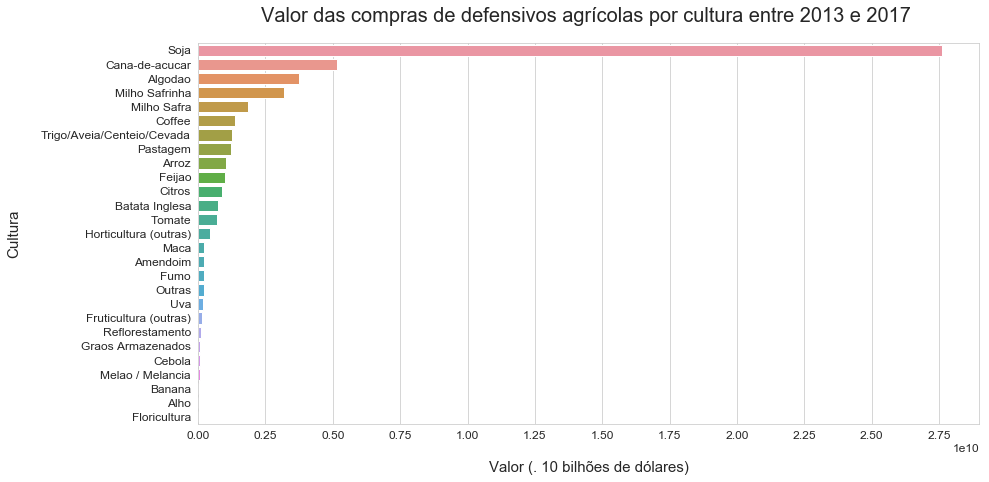

In [28]:
f = plt.figure(figsize=(14,7))
sns.barplot(data = data_vendas_cultura, y = data_vendas_cultura.Cultura, x = data_vendas_cultura['2013-2017'])

plt.title('Valor das compras de defensivos agrícolas por cultura entre 2013 e 2017 ', size=20, y=1.04)
plt.ylabel('Cultura', size = 15, labelpad = 20)
plt.xlabel('Valor (. 10 bilhões de dólares)', size=15, labelpad = 20)
plt.xticks(np.arange(0,data_vendas_cultura['2013-2017'].max()+0.1*10**10,0.25*10**10),fontsize=12)
f.savefig('09_Grafico_Barras_Vendas_por_Cultura_Total.png', dpi=300)

plt.show()

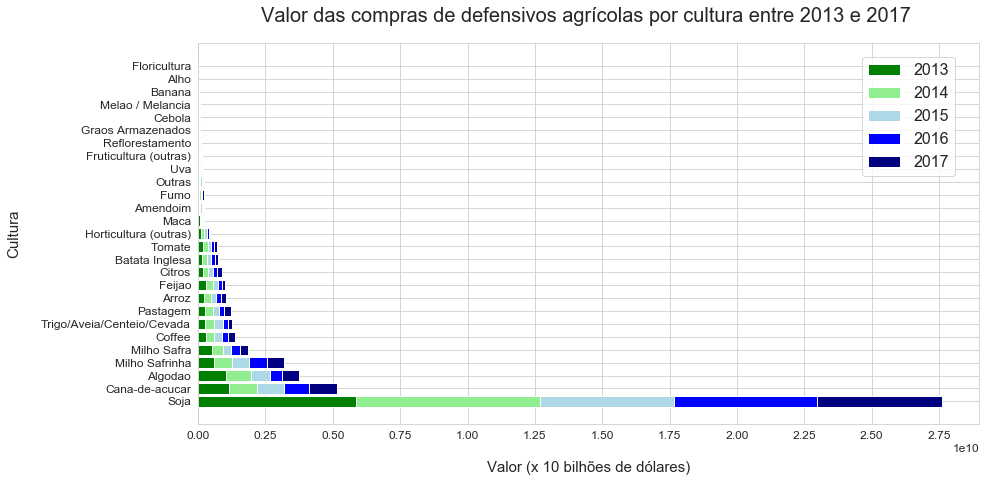

In [29]:
f = plt.figure(figsize=(14,7))
a1 = plt.barh(data_vendas_cultura.Cultura, data_vendas_cultura['2013'], color='green')
a2 = plt.barh(data_vendas_cultura.Cultura, data_vendas_cultura['2014'], color='lightgreen', left = data_vendas_cultura['2013'])
a3 = plt.barh(data_vendas_cultura.Cultura, data_vendas_cultura['2015'], color='lightblue', left = (data_vendas_cultura['2014'] + data_vendas_cultura['2013']))
a4 = plt.barh(data_vendas_cultura.Cultura, data_vendas_cultura['2016'], color='blue', left = (data_vendas_cultura['2015'] + data_vendas_cultura['2014'] + data_vendas_cultura['2013']))
a5 = plt.barh(data_vendas_cultura.Cultura, data_vendas_cultura['2017'], color='navy', left = (data_vendas_cultura['2016'] + data_vendas_cultura['2015'] + data_vendas_cultura['2014'] + data_vendas_cultura['2013']))

plt.title('Valor das compras de defensivos agrícolas por cultura entre 2013 e 2017 ', size=20, y=1.04)
plt.ylabel('Cultura', size = 15, labelpad = 20)
plt.xlabel('Valor (x 10 bilhões de dólares)', size=15, labelpad = 20)
plt.xticks(np.arange(0,data_vendas_cultura['2013-2017'].max()+0.1*10**10,0.25*10**10),fontsize=12)

plt.legend([a1,a2,a3,a4,a5],['2013','2014','2015','2016','2017'], fontsize = 16, loc = (.85,.65))
f.savefig('10_Grafico_Barras_Vendas_por_Cultura_2013_a_2017.png', dpi=300)

plt.show()

In [30]:
#nova linha com a soma das linhas 10 para frente
data_vendas_cultura_2 = data_vendas_cultura[:10]
data_vendas_cultura_2.tail()

,Cultura,2013,2014,2015,2016,2017,2013-2017
5,Coffee,292926072,309809108,269729548,239287808,246553378.4,1.358306e+09
9,Trigo/Aveia/Centeio/Cevada,243851516,338359438,324191661,216586998,142470516.4,1.265460e+09
6,Pastagem,258432601,298179573,218459181,204705038,244352977.3,1.224129e+09
8,Arroz,224195364,247390145,207131238,189019016,172258687.9,1.039994e+09
10,Feijao,290195689,271321892,171324261,150044296,121793798.5,1.004680e+09


In [31]:
#nova linha com a soma das linhas 10 para frente
data_vendas_cultura_2.loc[11] = ['Outros', data_vendas_cultura[10:]['2013'].sum(), data_vendas_cultura[10:]['2014'].sum(),
                                data_vendas_cultura[10:]['2015'].sum(), data_vendas_cultura[10:]['2016'].sum(), 
                                data_vendas_cultura[10:]['2017'].sum(), data_vendas_cultura[10:]['2013-2017'].sum()]
data_vendas_cultura_2

,Cultura,2013,2014,2015,2016,2017,2013-2017
0,Soja,5866403456,6804513174,4972049166,5324381897,4.637959e+09,2.760531e+10
1,Cana-de-acucar,1158865045,1031049511,983635664,938939682,1.042475e+09,5.154965e+09
3,Algodao,1040506078,923778657,702875273,464486204,5.991426e+08,3.730789e+09
2,Milho Safrinha,594558820,645880519,657504135,653343276,6.512101e+08,3.202497e+09
4,Milho Safra,504537904,431369387,280425787,340401624,2.943592e+08,1.851094e+09
5,Coffee,292926072,309809108,269729548,239287808,2.465534e+08,1.358306e+09
9,Trigo/Aveia/Centeio/Cevada,243851516,338359438,324191661,216586998,1.424705e+08,1.265460e+09
6,Pastagem,258432601,298179573,218459181,204705038,2.443530e+08,1.224129e+09
8,Arroz,224195364,247390145,207131238,189019016,1.722587e+08,1.039994e+09
10,Feijao,290195689,271321892,171324261,150044296,1.217938e+08,1.004680e+09


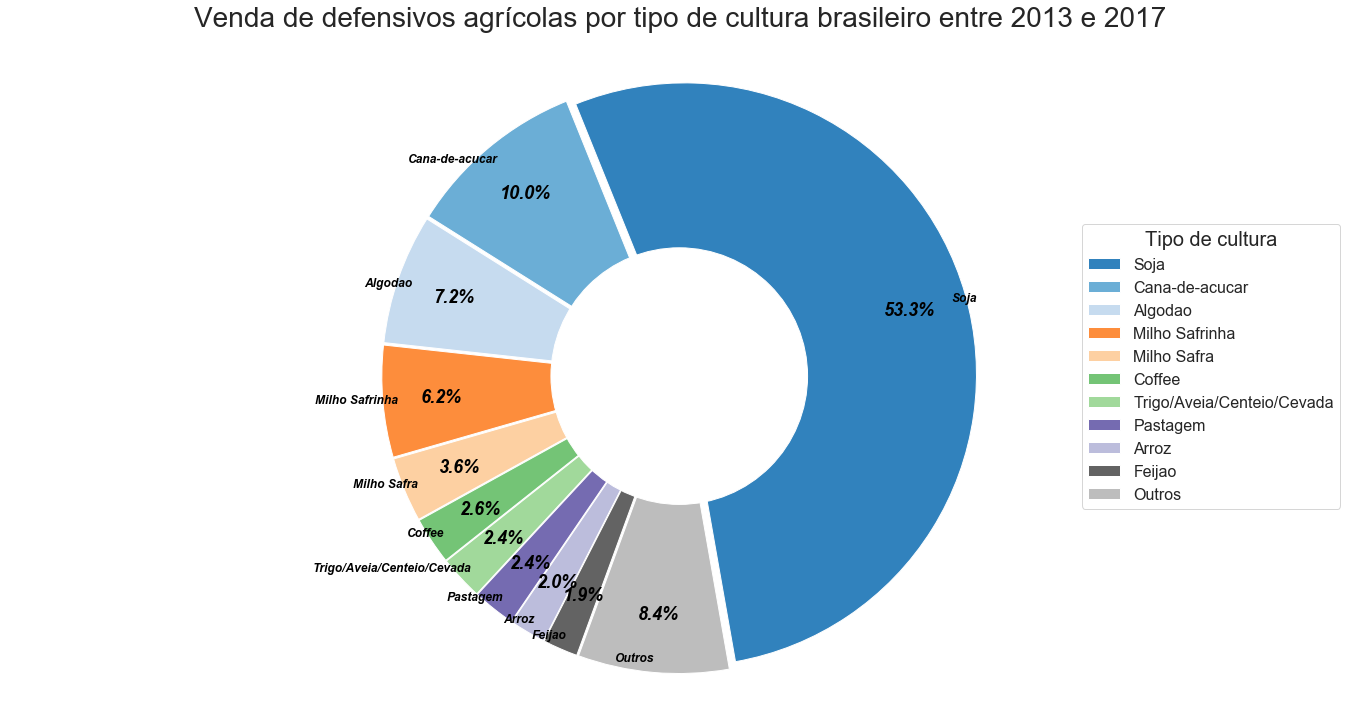

In [32]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 12

fig1, ax1 = plt.subplots()
fig1.set_size_inches((24,12))

cs=cm.tab20c(np.arange(11)/11)

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
patches, texts, autotexts = ax1.pie(x=data_vendas_cultura_2['2013-2017'], colors = cs, radius=5, autopct='%1.1f%%', 
        startangle = 280, 
        explode = explode,shadow=False,pctdistance=0.8, labels = data_vendas_cultura_2.Cultura, labeldistance = 0.95,
        textprops={'fontsize': 18, 'color': 'black','fontweight' : 'heavy', 'style':'italic'})

#texts[1].set_fontsize(20)

centre_circle = plt.Circle((0,0),2.2,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')

plt.title('Venda de defensivos agrícolas por tipo de cultura brasileiro entre 2013 e 2017'  , size=28, y=1.03)
legend = plt.legend(data_vendas_cultura_2.Cultura, title = 'Tipo de cultura',fontsize = 16, loc = (.8,.3))
plt.setp(legend.get_title(),fontsize=20)
fig.savefig('11_Grafico_Pizza_Vendas_por_Cultura_Total.png', dpi=300)

plt.show()

In [33]:
#transposicao da tabela
data_vendas_cultura_transp = data_vendas_cultura.set_index('Cultura').T.reset_index()
data_vendas_cultura_transp = data_vendas_cultura_transp.rename({'index':'Ano'}, axis = 'columns')
data_vendas_cultura_transp = data_vendas_cultura_transp.drop([5])
data_vendas_cultura_transp

Cultura,Ano,Soja,Cana-de-acucar,Algodao,Milho Safrinha,Milho Safra,Coffee,Trigo/Aveia/Centeio/Cevada,Pastagem,Arroz,...,Outras,Uva,Fruticultura (outras),Reflorestamento,Graos Armazenados,Cebola,Melao / Melancia,Banana,Alho,Floricultura
0,2013,5.866403e+09,1.158865e+09,1.040506e+09,594558820.0,504537904.0,292926072.0,243851516.0,258432601.0,224195364.0,...,43800046.00,38966667.00,32718568.00,7752173.00,35495402.00,17891706.00,1.138643e+07,1.665365e+07,1949630.000,1240058.000
1,2014,6.804513e+09,1.031050e+09,9.237787e+08,645880519.0,431369387.0,309809108.0,338359438.0,298179573.0,247390145.0,...,43764327.00,34804041.00,26812010.00,7958941.00,14377907.00,4613209.00,1.095553e+07,1.391693e+07,1935554.000,2081400.000
2,2015,4.972049e+09,9.836357e+08,7.028753e+08,657504135.0,280425787.0,269729548.0,324191661.0,218459181.0,207131238.0,...,47356713.00,29187688.00,21479256.00,21402089.00,5430227.00,16843905.00,1.309046e+07,6.667504e+06,1255988.000,1530751.000
3,2016,5.324382e+09,9.389397e+08,4.644862e+08,653343276.0,340401624.0,239287808.0,216586998.0,204705038.0,189019016.0,...,53105346.00,32457338.00,31349845.00,36202398.00,4122249.00,14709688.00,1.819010e+07,5.081141e+06,1607033.000,1504641.000
4,2017,4.637959e+09,1.042475e+09,5.991426e+08,651210066.7,294359197.9,246553378.4,142470516.4,244352977.3,172258687.9,...,14685274.36,29466323.37,22136536.42,45167695.79,25924818.82,10812934.81,8.122882e+06,5.688638e+06,3549328.445,2019267.654


In [34]:
str(data_vendas_cultura_transp[data_vendas_cultura_transp.Ano =='2014'].Soja.values)
data_vendas_cultura_transp.Soja.max()

6804513174.0

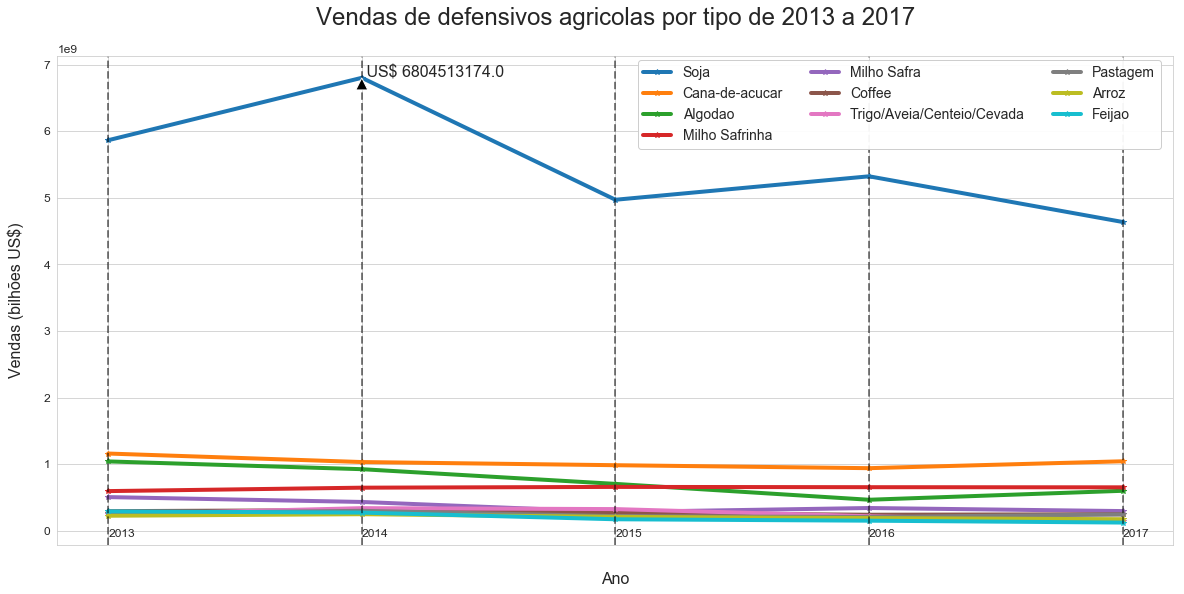

In [35]:
f = data_vendas_cultura_transp.plot(x='Ano', y= data_vendas_cultura_transp.columns[1:11], figsize = (20,9), 
                                   marker = '*', style = '-', linewidth = 4)
# axvline e ano para cada ano
for i in data_vendas_estado_transp.Ano:
    plt.axvline(x=i,color='k', linewidth=2, linestyle='--', alpha = 0.5)
    # anotar o ano
    plt.annotate(i, xy=(i,-0.1*10**9))

plt.annotate(' US$ '+str(data_vendas_cultura_transp.Soja.max()), 
             xy=('2014', data_vendas_cultura_transp.Soja.max()),
             arrowprops=dict(facecolor='black', shrink=0.05), size=16)

plt.title('Vendas de defensivos agricolas por tipo de 2013 a 2017',size=24, y=1.05)
plt.xlabel('Ano',size=16, labelpad=20)
plt.ylabel('Vendas (bilhões US$)',size=16, labelpad=20)
plt.legend( fontsize = 14, loc = (0.52,.81), ncol=3, framealpha = 0.95)
fig = f.get_figure()
fig.savefig('12_Grafico_linha_Vendas_por_Tipo_Total.png', dpi=300)

plt.show()